# 속성 데이터 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_classification.csv

--2021-09-23 04:00:18--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.008s  

2021-09-23 04:00:18 (6.78 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [3]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
print(train_x[:5])
print(train_y[:5])

[[-0.31337809  0.30957112  0.04384399 -0.37591457 -0.38801883 -0.19621355
  -1.6232409 ]
 [ 1.62127732 -0.86291079 -0.98822662 -1.15531431 -1.38636759  0.31124167
   0.54846706]
 [ 0.32723628 -0.86291079 -0.92133315 -0.37591457 -0.83892399 -0.01497955
  -0.80885042]
 [ 0.71160491 -0.86291079 -0.99778282 -0.89551439 -1.22507776 -0.55868157
  -0.26592342]
 [ 0.07099053  0.30957112  0.05340019 -0.60973449  0.04051767  0.74620329
   0.00554007]]
[0. 2. 1. 1. 0.]


In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


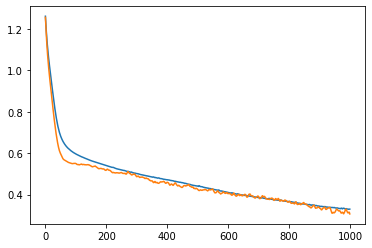

3/3 [==============================] - 0s 4ms/step - loss: 0.3473 - acc: 0.8481
loss= 0.3472847640514374
acc= 0.8481012582778931


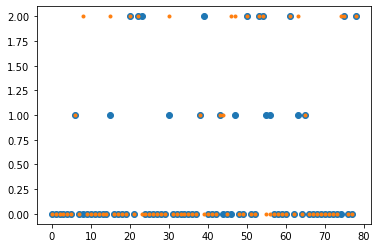

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()